In [1]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 7.1 MB/s 


In [18]:
!pip install scikit-plot

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score,confusion_matrix,roc_curve,roc_auc_score,accuracy_score,precision_score,recall_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from tqdm import tqdm
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, BatchNormalization,concatenate,Flatten,Embedding,Dense,Dropout,MaxPooling2D,Input,Conv1D,CuDNNLSTM,Activation
from keras.models import Model
from keras.regularizers import l1,l2
from keras.initializers import he_normal,glorot_normal
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping
from keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam
import tokenization
import datetime
from xgboost import XGBClassifier
import tensorflow_hub as hub
import scikitplot as skplt
from gensim.models import FastText

In [6]:
data = pd.read_csv('/content/drive/MyDrive/case_study_2/input/inception_features.csv')

In [7]:
#considering features 'Text','created_utc','subscribers','char_count','Sentiment'
X = data[['Text','created_utc','subscribers','char_count','Sentiment']]
y = data['dank_level']

### Bow Of Words

In [9]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2,max_features=10000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(data['Text'].values.astype('U'))
df_bow = pd.DataFrame(bow.todense())
df_bow['dank_level'] = data['dank_level']

In [10]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(df_bow.drop('dank_level',axis=1),df_bow['dank_level'],test_size=0.3,random_state=2)

In [11]:
xgb = XGBClassifier(random_state=22,learning_rate=0.9,n_jobs=-1)
params={'n_estimators':[500,1000],
        'max_depth':[5,7,9]}
xgb_clf=RandomizedSearchCV(xgb,params,cv=3,verbose=15,
                           n_iter=5,random_state=0)

xgb_clf.fit(x_train_bow,y_train_bow) 

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=1000, max_depth=9 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_estimators=1000, max_depth=9, score=0.521, total= 8.7min
[CV] n_estimators=1000, max_depth=9 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.7min remaining:    0.0s


[CV] ...... n_estimators=1000, max_depth=9, score=0.548, total= 8.5min
[CV] n_estimators=1000, max_depth=9 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 17.3min remaining:    0.0s


[CV] ...... n_estimators=1000, max_depth=9, score=0.523, total= 8.6min
[CV] n_estimators=500, max_depth=7 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 25.9min remaining:    0.0s


[CV] ....... n_estimators=500, max_depth=7, score=0.527, total= 3.4min
[CV] n_estimators=500, max_depth=7 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 29.3min remaining:    0.0s


[CV] ....... n_estimators=500, max_depth=7, score=0.536, total= 3.4min
[CV] n_estimators=500, max_depth=7 ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 32.7min remaining:    0.0s


[CV] ....... n_estimators=500, max_depth=7, score=0.529, total= 3.4min
[CV] n_estimators=1000, max_depth=5 ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 36.1min remaining:    0.0s


[CV] ...... n_estimators=1000, max_depth=5, score=0.518, total= 5.0min
[CV] n_estimators=1000, max_depth=5 ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 41.1min remaining:    0.0s


[CV] ...... n_estimators=1000, max_depth=5, score=0.531, total= 5.0min
[CV] n_estimators=1000, max_depth=5 ..................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 46.1min remaining:    0.0s


[CV] ...... n_estimators=1000, max_depth=5, score=0.526, total= 5.0min
[CV] n_estimators=1000, max_depth=7 ..................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 51.1min remaining:    0.0s


[CV] ...... n_estimators=1000, max_depth=7, score=0.528, total= 6.8min
[CV] n_estimators=1000, max_depth=7 ..................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 57.9min remaining:    0.0s


[CV] ...... n_estimators=1000, max_depth=7, score=0.547, total= 6.9min
[CV] n_estimators=1000, max_depth=7 ..................................


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed: 64.8min remaining:    0.0s


[CV] ...... n_estimators=1000, max_depth=7, score=0.523, total= 6.9min
[CV] n_estimators=500, max_depth=5 ...................................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 71.7min remaining:    0.0s


[CV] ....... n_estimators=500, max_depth=5, score=0.534, total= 2.5min
[CV] n_estimators=500, max_depth=5 ...................................


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed: 74.3min remaining:    0.0s


[CV] ....... n_estimators=500, max_depth=5, score=0.536, total= 2.5min
[CV] n_estimators=500, max_depth=5 ...................................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed: 76.8min remaining:    0.0s


[CV] ....... n_estimators=500, max_depth=5, score=0.528, total= 2.5min


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 79.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.9, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=22, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='

In [12]:
xgb_clf.best_params_

{'max_depth': 5, 'n_estimators': 500}

In [13]:
clf = XGBClassifier(random_state=22,learning_rate=0.9,n_jobs=-1,max_depth= 5, n_estimators= 500)
clf.fit(x_train_bow,y_train_bow)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=22,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [20]:
y_pred=clf.predict(x_test_bow)
print("Accuracy:",accuracy_score(y_test_bow, y_pred))
print("Precision: ",precision_score(y_test_bow,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test_bow,y_pred,average='weighted'))
print("F-1 Score: ",f1_score(y_test_bow, y_pred,average='weighted'))

Accuracy: 0.5157142857142857
Precision:  0.516307850180253
Recall:  0.5157142857142857
F-1 Score:  0.5156698099283337


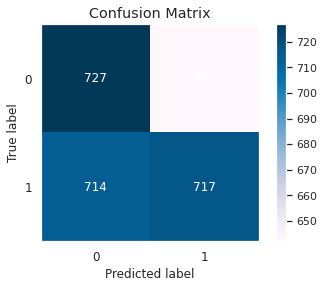

In [27]:
matrix = skplt.metrics.plot_confusion_matrix(y_test_bow,y_pred,labels=[0,1],cmap='PuBu')

No handles with labels found to put in legend.


AUC= 0.5346644451692897


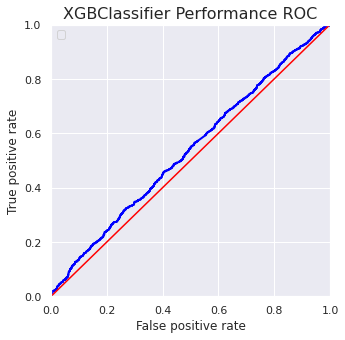

In [15]:
 y_pred = clf.predict_proba(x_test_bow)
fpr, tpr, thresholds = roc_curve(y_test_bow, y_pred[:,1], pos_label=1, sample_weight=None)
auc = roc_auc_score(y_test_bow, y_pred[:,1], sample_weight=None)
print("AUC=", auc)

# plot ROC curves 
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0,color='blue')
plt.plot([0,1],[0,1],color='red')
plt.legend()
plt.xlabel('False positive rate',fontsize=12); plt.ylabel('True positive rate',fontsize=12)
plt.xlim([0,1]); plt.ylim([0,1])
plt.title('XGBClassifier Performance ROC', fontsize=16)
plt.show()

### TFIDF Vectorizer

In [59]:
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=10000,stop_words='english')
tfidf_matrix=tfidf.fit_transform(data['Text'].values.astype('U'))
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf['dank_level']=data['dank_level']

In [60]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(df_tfidf.drop('dank_level',axis=1),df_tfidf['dank_level'],test_size=0.3,random_state=17)

In [61]:
xgb = XGBClassifier(random_state=22,learning_rate=0.9,max_depth=5,n_estimators=500,n_jobs=-1 )
xgb.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=22,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [62]:
y_pred=xgb.predict(x_test_tfidf)
print("Accuracy:",accuracy_score(y_test_tfidf, y_pred))
print("Precision: ",precision_score(y_test_tfidf,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test_tfidf,y_pred,average='weighted'))
print("F-1 Score: ",f1_score(y_test_tfidf, y_pred,average='weighted'))

Accuracy: 0.5085714285714286
Precision:  0.5086066178366024
Recall:  0.5085714285714286
F-1 Score:  0.5085879858758259


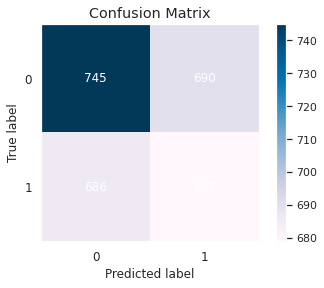

In [63]:
matrix = skplt.metrics.plot_confusion_matrix(y_test_tfidf,y_pred,labels=[0,1],cmap='PuBu')

No handles with labels found to put in legend.


AUC= 0.5176602723641052


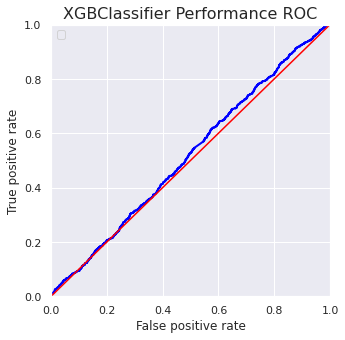

In [64]:
y_pred = xgb.predict_proba(x_test_tfidf)
fpr, tpr, thresholds = roc_curve(y_test_tfidf, y_pred[:,1], pos_label=1, sample_weight=None)
auc = roc_auc_score(y_test_tfidf, y_pred[:,1], sample_weight=None)
print("AUC=", auc)

# plot ROC curves 
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0,color='blue')
plt.plot([0,1],[0,1],color='red')
plt.legend()
plt.xlabel('False positive rate',fontsize=12)
plt.ylabel('True positive rate',fontsize=12)
plt.xlim([0,1]); plt.ylim([0,1])
plt.title('XGBClassifier Performance ROC', fontsize=16)
plt.show()

### LSTM Model

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(data['Text'].astype(str),data['dank_level'],test_size=0.3)

In [29]:
l = []
for text in data['Text'].astype(str):
    l.append(len(text.split(" ")))
print(max(l))

212


In [30]:
max_words = 10000
max_len = 212
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
train_sequences = tok.texts_to_sequences(X_train)
train_sequences_matrix = pad_sequences(train_sequences,maxlen=max_len)
word_index = tok.word_index
print("unique words : {}".format(len(word_index)))

unique words : 15569


In [31]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [39]:
inputs = Input(name='inputs',shape=[train_sequences_matrix.shape[1]])
layer = Embedding(max_words,50,input_length=train_sequences_matrix.shape[1])(inputs)
layer = LSTM(64,return_sequences=True)(layer)
layer = Flatten()(layer)
layer = Dense(128,name='FC1')(layer)
layer = Activation('relu')(layer)
layer = Dense(164,name='FC2')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.3)(layer)
layer = Dense(1,name='out_layer')(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs=inputs,outputs=layer)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 212)]             0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 212, 50)           500000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 212, 64)           29440     
_________________________________________________________________
flatten_3 (Flatten)          (None, 13568)             0         
_________________________________________________________________
FC1 (Dense)                  (None, 128)               1736832   
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 164)               2115

In [40]:
tf.keras.backend.clear_session()
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0006,decay=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics=['accuracy'])

In [41]:
model.fit(train_sequences_matrix,Y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
41/41 [==============================] - 7s 31ms/step - loss: 0.6942 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.4966
Epoch 2/10
41/41 [==============================] - 1s 18ms/step - loss: 0.6926 - accuracy: 0.5225 - val_loss: 0.6924 - val_accuracy: 0.5287
Epoch 3/10
41/41 [==============================] - 1s 17ms/step - loss: 0.6355 - accuracy: 0.6607 - val_loss: 0.7874 - val_accuracy: 0.4950
Epoch 4/10
41/41 [==============================] - 1s 18ms/step - loss: 0.4332 - accuracy: 0.8013 - val_loss: 0.9498 - val_accuracy: 0.4935
Epoch 5/10
41/41 [==============================] - 1s 17ms/step - loss: 0.2732 - accuracy: 0.8798 - val_loss: 1.2211 - val_accuracy: 0.4866
Epoch 6/10
41/41 [==============================] - 1s 17ms/step - loss: 0.1896 - accuracy: 0.9236 - val_loss: 1.4955 - val_accuracy: 0.5080
Epoch 7/10
41/41 [==============================] - 1s 17ms/step - loss: 0.1302 - accuracy: 0.9489 - val_loss: 1.9957 - val_accuracy: 0.5111
Epoch 8/10
41

In [42]:
predictions = model.predict(test_sequences_matrix)
y_pred = []
for pred in predictions:
    if pred < 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [43]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Precision: ",precision_score(Y_test,y_pred))
print("Recall: ",recall_score(Y_test, y_pred)) 
print("F-1 Score: ",f1_score(Y_test, y_pred))

Accuracy: 0.5210714285714285
Precision:  0.5195195195195195
Recall:  0.49676956209619527
F-1 Score:  0.5078899082568807


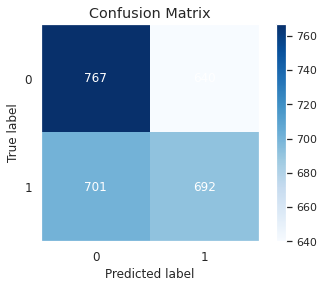

In [45]:
matrix = skplt.metrics.plot_confusion_matrix(Y_test,y_pred,labels=[0,1])

No handles with labels found to put in legend.


AUC= 0.519316044125593


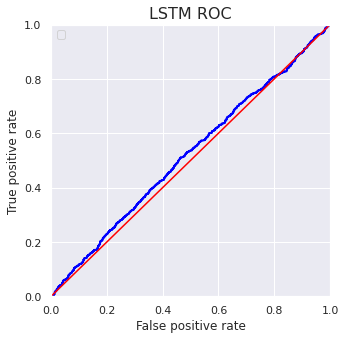

In [46]:
y_pred = model.predict(test_sequences_matrix)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred, pos_label=1, sample_weight=None)
auc = roc_auc_score(Y_test, y_pred, sample_weight=None)
print("AUC=", auc)

# plot ROC curves 
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0,color='blue')
plt.plot([0,1],[0,1],color='red')
plt.legend()
plt.xlabel('False positive rate',fontsize=12); plt.ylabel('True positive rate',fontsize=12)
plt.xlim([0,1]); plt.ylim([0,1])
plt.title('LSTM ROC', fontsize=16)
plt.show()

### Word2Vec

In [47]:
embeddings_index = {}
f = open('/content/drive/MyDrive/glove.6B.300d.txt','r')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [48]:
embedding_mat = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vec = embeddings_index.get(word)
    if embedding_vec is not None:
        embedding_mat[i] = embedding_vec

In [49]:
len(np.where(~embedding_mat.any(axis=1))[0])

6931

In [52]:
inputs = Input(name='inputs',shape=[train_sequences_matrix.shape[1]])
layer = Embedding(len(word_index) + 1,300,weights=[embedding_mat],input_length=max_len,trainable=False)(inputs)
layer = LSTM(64,return_sequences=True)(layer)
layer = Flatten()(layer)
layer = Dense(128,name='FC1')(layer)
layer = Activation('relu')(layer)
layer = Dense(164,name='FC2')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.3)(layer)
layer = Dense(1,name='out_layer')(layer)
layer = Activation('sigmoid')(layer)
w2v_model = Model(inputs=inputs,outputs=layer)
w2v_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 212)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 212, 300)          4671000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 212, 64)           93440     
_________________________________________________________________
flatten_1 (Flatten)          (None, 13568)             0         
_________________________________________________________________
FC1 (Dense)                  (None, 128)               1736832   
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 164)               2115

In [53]:
tf.keras.backend.clear_session()
w2v_model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0006,decay=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics=['accuracy'])

In [54]:
w2v_model.fit(train_sequences_matrix,Y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
41/41 [==============================] - 3s 30ms/step - loss: 0.6936 - accuracy: 0.5026 - val_loss: 0.6913 - val_accuracy: 0.5180
Epoch 2/10
41/41 [==============================] - 1s 17ms/step - loss: 0.6824 - accuracy: 0.5493 - val_loss: 0.6898 - val_accuracy: 0.5532
Epoch 3/10
41/41 [==============================] - 1s 17ms/step - loss: 0.6520 - accuracy: 0.6132 - val_loss: 0.7157 - val_accuracy: 0.5210
Epoch 4/10
41/41 [==============================] - 1s 17ms/step - loss: 0.5942 - accuracy: 0.6691 - val_loss: 0.7361 - val_accuracy: 0.5218
Epoch 5/10
41/41 [==============================] - 1s 17ms/step - loss: 0.5274 - accuracy: 0.7317 - val_loss: 0.8236 - val_accuracy: 0.5111
Epoch 6/10
41/41 [==============================] - 1s 17ms/step - loss: 0.4382 - accuracy: 0.7887 - val_loss: 0.9651 - val_accuracy: 0.5203
Epoch 7/10
41/41 [==============================] - 1s 17ms/step - loss: 0.3454 - accuracy: 0.8442 - val_loss: 1.2095 - val_accuracy: 0.5203
Epoch 8/10
41

In [55]:
predictions = model.predict(test_sequences_matrix)
y_pred = []
for pred in predictions:
    if pred < 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [56]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Precision: ",precision_score(Y_test,y_pred))
print("Recall: ",recall_score(Y_test, y_pred)) 
print("F-1 Score: ",f1_score(Y_test, y_pred))

Accuracy: 0.5003571428571428
Precision:  0.43478260869565216
Recall:  0.014357501794687724
F-1 Score:  0.027797081306462818


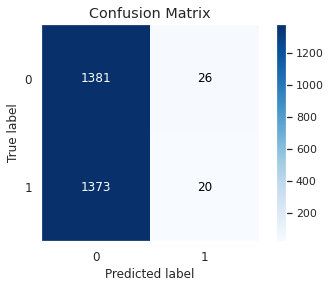

In [57]:
matrix = skplt.metrics.plot_confusion_matrix(Y_test,y_pred,labels=[0,1])

No handles with labels found to put in legend.


AUC= 0.527681814494342


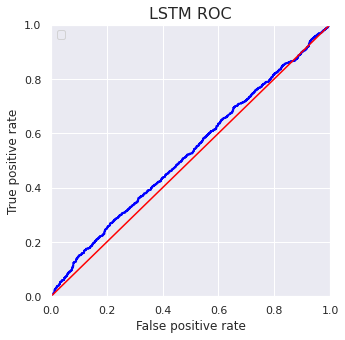

In [58]:
y_pred = w2v_model.predict(test_sequences_matrix)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred, pos_label=1, sample_weight=None)
auc = roc_auc_score(Y_test, y_pred, sample_weight=None)
print("AUC=", auc)

# plot ROC curves 
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0,color='blue')
plt.plot([0,1],[0,1],color='red')
plt.legend()
plt.xlabel('False positive rate',fontsize=12); plt.ylabel('True positive rate',fontsize=12)
plt.xlim([0,1]); plt.ylim([0,1])
plt.title('LSTM ROC', fontsize=16)
plt.show()

### BERT Model

In [65]:
max_seq_length = 214
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

#mask vector if you are padding anything
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

#segment vectors. If you are giving only one sentence for the classification, total seg vector is 0. 
#If you are giving two sentenced with [sep] token separated, first seq segment vectors are zeros and 
#second seq segment vector are 1's
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

#bert layer 
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

#Bert model
#We are using only pooled output not sequence out. 
#If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)

In [66]:
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 214)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 214)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 214)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [67]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [69]:
X_train_tokens = np.empty(shape=(0,max_seq_length))
X_train_mask = np.empty(shape=(0,max_seq_length))
X_train_segment = np.empty(shape=(0,max_seq_length))   
for text in tqdm(X_train.values):  
    tokens = tokenizer.tokenize(text)
    tokens = tokens[0:(max_seq_length-2)]
    tokens = ['[CLS]',*tokens,'[SEP]']
    tokens = tokenizer.convert_tokens_to_ids(tokens)
    X_train_tokens = np.append(X_train_tokens,np.array([tokens+[0]*(max_seq_length-len(tokens))]),axis=0)
    X_train_mask = np.append(X_train_mask,np.array([[1]*len(tokens)+[0]*(max_seq_length-len(tokens))]),axis=0)
    X_train_segment = np.append(X_train_segment,np.array([[0]*max_seq_length]),axis=0)

100%|██████████| 6532/6532 [00:22<00:00, 291.98it/s]


In [71]:
X_test_tokens = np.empty(shape=(0,max_seq_length))
X_test_mask = np.empty(shape=(0,max_seq_length))
X_test_segment = np.empty(shape=(0,max_seq_length))    
for text in tqdm(X_test.values): 
    tokens = tokenizer.tokenize(text)
    tokens = tokens[0:(max_seq_length-2)]
    tokens = ['[CLS]',*tokens,'[SEP]']
    tokens = tokenizer.convert_tokens_to_ids(tokens)
    X_test_tokens = np.append(X_test_tokens,np.array([tokens+[0]*(max_seq_length-len(tokens))]),axis=0)
    X_test_mask = np.append(X_test_mask,np.array([[1]*len(tokens)+[0]*(max_seq_length-len(tokens))]),axis=0)
    X_test_segment = np.append(X_test_segment,np.array([[0]*max_seq_length]),axis=0)

100%|██████████| 2800/2800 [00:04<00:00, 683.17it/s]


In [72]:
bert_model.input

[<KerasTensor: shape=(None, 214) dtype=int32 (created by layer 'input_word_ids')>,
 <KerasTensor: shape=(None, 214) dtype=int32 (created by layer 'input_mask')>,
 <KerasTensor: shape=(None, 214) dtype=int32 (created by layer 'segment_ids')>]

In [73]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

In [74]:
X_train_pooled_output=bert_model.predict([X_train_tokens,X_train_mask,X_train_segment])
X_test_pooled_output=bert_model.predict([X_test_tokens,X_test_mask,X_test_segment])

In [78]:
inputs = Input(name='inputs',shape=768)
layer = Embedding(len(word_index)+1,212,input_length=768)(inputs)
layer = LSTM(64,return_sequences=True)(layer)
layer = Flatten()(layer)
layer = Dense(128,name='FC1')(layer)
layer = Activation('relu')(layer)
layer = Dense(164,name='FC2')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.3)(layer)
layer = Dense(1,name='out_layer')(layer)
layer = Activation('sigmoid')(layer)
bertmodel = Model(inputs=inputs,outputs=layer)
bertmodel.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 768)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 768, 212)          3300840   
_________________________________________________________________
lstm_1 (LSTM)                (None, 768, 64)           70912     
_________________________________________________________________
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
FC1 (Dense)                  (None, 128)               6291584   
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 164)               2115

In [79]:
tf.keras.backend.clear_session()
bertmodel.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0006,decay=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics=['accuracy'])

In [80]:
bertmodel.fit(X_train_pooled_output,Y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
41/41 [==============================] - 5s 74ms/step - loss: 0.7018 - accuracy: 0.4965 - val_loss: 0.6933 - val_accuracy: 0.5034
Epoch 2/10
41/41 [==============================] - 3s 62ms/step - loss: 0.6958 - accuracy: 0.4978 - val_loss: 0.7087 - val_accuracy: 0.5034
Epoch 3/10
41/41 [==============================] - 2s 61ms/step - loss: 0.6971 - accuracy: 0.4984 - val_loss: 0.6955 - val_accuracy: 0.4966
Epoch 4/10
41/41 [==============================] - 3s 61ms/step - loss: 0.6952 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.4973
Epoch 5/10
41/41 [==============================] - 2s 61ms/step - loss: 0.6966 - accuracy: 0.5087 - val_loss: 0.6936 - val_accuracy: 0.5034
Epoch 6/10
41/41 [==============================] - 3s 62ms/step - loss: 0.6953 - accuracy: 0.5024 - val_loss: 0.6942 - val_accuracy: 0.5034
Epoch 7/10
41/41 [==============================] - 3s 61ms/step - loss: 0.6960 - accuracy: 0.4850 - val_loss: 0.6932 - val_accuracy: 0.5034
Epoch 8/10
41

In [82]:
predictions = bertmodel.predict(X_test_pooled_output)
y_pred = []
for pred in predictions:
    if pred < 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [83]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Precision: ",precision_score(Y_test,y_pred))
print("Recall: ",recall_score(Y_test, y_pred)) 
print("F-1 Score: ",f1_score(Y_test, y_pred))

Accuracy: 0.5064285714285715
Precision:  0.5251141552511416
Recall:  0.08255563531945441
F-1 Score:  0.14267990074441686


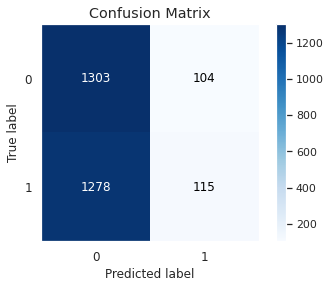

In [84]:
matrix = skplt.metrics.plot_confusion_matrix(Y_test,y_pred,labels=[0,1])

AUC= 0.5125140883624132


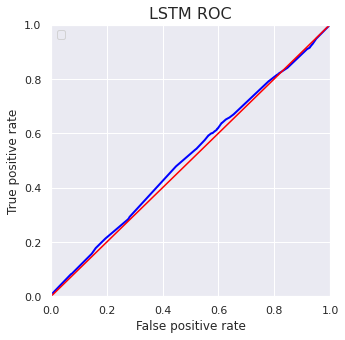

In [85]:
y_pred = bertmodel.predict(X_test_pooled_output)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred, pos_label=1, sample_weight=None)
auc = roc_auc_score(Y_test, y_pred, sample_weight=None)
print("AUC=", auc)

# plot ROC curves 
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0,color='blue')
plt.plot([0,1],[0,1],color='red')
plt.legend()
plt.xlabel('False positive rate',fontsize=12); plt.ylabel('True positive rate',fontsize=12)
plt.xlim([0,1]); plt.ylim([0,1])
plt.title('LSTM ROC', fontsize=16)
plt.show()

### FastText

In [87]:
#loading fasttext word embeddings
def load_fasttext():
        print('loading word embeddings...')
        embeddings_index = {}
        f = open('/content/drive/MyDrive/wiki-news-300d-1M.vec',encoding='utf-8')
        for line in tqdm(f):
            values = line.strip().rsplit(' ')
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        f.close()
        print('found %s word vectors' % len(embeddings_index))
    
        return embeddings_index

embeddings_index=load_fasttext()

loading word embeddings...


999995it [01:21, 12343.89it/s]


found 999995 word vectors


In [88]:
embedding_mat = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vec = embeddings_index.get(word)
    if embedding_vec is not None:
        embedding_mat[i] = embedding_vec

In [89]:
len(np.where(~embedding_mat.any(axis=1))[0])

6861

In [99]:
#building LSTM Model
inputs = Input(name='inputs',shape=[train_sequences_matrix.shape[1]])
layer = Embedding(len(word_index) + 1,300,weights=[embedding_mat],input_length=max_len,trainable=False)(inputs)
layer = LSTM(64,return_sequences=True)(layer)
layer = Flatten()(layer)
layer = Dense(128,name='FC1')(layer)
layer = Activation('relu')(layer)
layer = Dense(164,name='FC2')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.3)(layer)
layer = Dense(1,name='out_layer')(layer)
layer = Activation('sigmoid')(layer)
fasttext_model = Model(inputs=inputs,outputs=layer)
fasttext_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 212)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 212, 300)          4671000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 212, 64)           93440     
_________________________________________________________________
flatten_1 (Flatten)          (None, 13568)             0         
_________________________________________________________________
FC1 (Dense)                  (None, 128)               1736832   
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 164)               2115

In [100]:
tf.keras.backend.clear_session()
fasttext_model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0006,decay=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics=['accuracy'])

In [101]:
fasttext_model.fit(train_sequences_matrix,Y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
41/41 [==============================] - 3s 29ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6913 - val_accuracy: 0.5034
Epoch 2/10
41/41 [==============================] - 1s 17ms/step - loss: 0.6894 - accuracy: 0.5355 - val_loss: 0.6907 - val_accuracy: 0.5325
Epoch 3/10
41/41 [==============================] - 1s 17ms/step - loss: 0.6779 - accuracy: 0.5726 - val_loss: 0.6946 - val_accuracy: 0.5318
Epoch 4/10
41/41 [==============================] - 1s 17ms/step - loss: 0.6590 - accuracy: 0.6059 - val_loss: 0.7143 - val_accuracy: 0.5226
Epoch 5/10
41/41 [==============================] - 1s 17ms/step - loss: 0.6365 - accuracy: 0.6308 - val_loss: 0.7563 - val_accuracy: 0.5057
Epoch 6/10
41/41 [==============================] - 1s 17ms/step - loss: 0.6126 - accuracy: 0.6538 - val_loss: 0.7629 - val_accuracy: 0.5080
Epoch 7/10
41/41 [==============================] - 1s 17ms/step - loss: 0.5788 - accuracy: 0.6811 - val_loss: 0.7969 - val_accuracy: 0.5019
Epoch 8/10
41

In [102]:
predictions = fasttext_model.predict(test_sequences_matrix)
y_pred = []
for pred in predictions:
    if pred < 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [103]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Precision: ",precision_score(Y_test,y_pred))
print("Recall: ",recall_score(Y_test, y_pred)) 
print("F-1 Score: ",f1_score(Y_test, y_pred))

Accuracy: 0.5314285714285715
Precision:  0.5309396485867074
Recall:  0.4989231873653984
F-1 Score:  0.5144337527757217


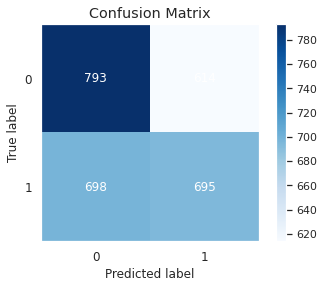

In [104]:
matrix = skplt.metrics.plot_confusion_matrix(Y_test,y_pred,labels=[0,1])

AUC= 0.5393451162809682


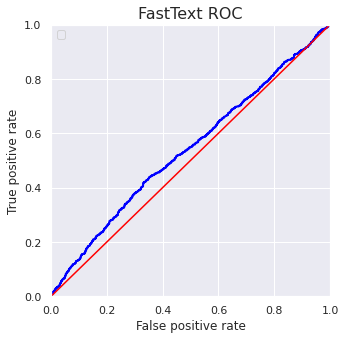

In [106]:
y_pred = fasttext_model.predict(test_sequences_matrix)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred, pos_label=1, sample_weight=None)
auc = roc_auc_score(Y_test, y_pred, sample_weight=None)
print("AUC=", auc)

# plot ROC curves 
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0,color='blue')
plt.plot([0,1],[0,1],color='red')
plt.legend()
plt.xlabel('False positive rate',fontsize=12); plt.ylabel('True positive rate',fontsize=12)
plt.xlim([0,1]); plt.ylim([0,1])
plt.title('FastText ROC', fontsize=16)
plt.show()

In [110]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model", "Textdata Model","Accuracy", "Precision", "Recall","F1-Score","AUC"])
  
# Add rows
myTable.add_row(["XGBClassifier", "BOW", "51.57 %","51.63 %","51.57 %","51.56 %","53.46 %"])
myTable.add_row(["XGBClassifier", "TFIDF", "50.85 %","50.86 %","50.85 %","50.85 %","51.76 %"])
myTable.add_row(["LSTM", "Tokenization", "52.10 %","51.95 %","49.67 %","50.78 %","51.93 %"])
myTable.add_row(["LSTM", "Word2Vec","50.03 %","43.47 %","1.43 %","2.27 %","52.76 %"])
myTable.add_row(["LSTM", "BERT",  "50.64 %","52.51 %","8.25 %","14.26 %","51.25 %"])
myTable.add_row(["LSTM", "FastText", "53.14 %","53.09 %","49.89 %","51.44 %","53.93 %"])
print(myTable)

+---------------+----------------+----------+-----------+---------+----------+---------+
|     Model     | Textdata Model | Accuracy | Precision |  Recall | F1-Score |   AUC   |
+---------------+----------------+----------+-----------+---------+----------+---------+
| XGBClassifier |      BOW       | 51.57 %  |  51.63 %  | 51.57 % | 51.56 %  | 53.46 % |
| XGBClassifier |     TFIDF      | 50.85 %  |  50.86 %  | 50.85 % | 50.85 %  | 51.76 % |
|      LSTM     |  Tokenization  | 52.10 %  |  51.95 %  | 49.67 % | 50.78 %  | 51.93 % |
|      LSTM     |    Word2Vec    | 50.03 %  |  43.47 %  |  1.43 % |  2.27 %  | 52.76 % |
|      LSTM     |      BERT      | 50.64 %  |  52.51 %  |  8.25 % | 14.26 %  | 51.25 % |
|      LSTM     |    FastText    | 53.14 %  |  53.09 %  | 49.89 % | 51.44 %  | 53.93 % |
+---------------+----------------+----------+-----------+---------+----------+---------+


FastText with LSTM Model giving good results.